In [1]:
!pip install -q kaggle
!cp kaggle.json ~/.kaggle/
from google.colab import files
files.upload()
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json
!kaggle datasets download -d alexattia/the-simpsons-characters-dataset

cp: cannot stat 'kaggle.json': No such file or directory


Saving kaggle.json to kaggle.json
100% 1.08G/1.08G [00:11<00:00, 107MB/s] 
100% 1.08G/1.08G [00:11<00:00, 102MB/s]


In [2]:
!unzip the-simpsons-characters-dataset.zip
!rm -rf the-simpsons-characters-dataset.zip
!rm -rf simpsons_dataset/simpsons_dataset

Выходные данные были обрезаны до нескольких последних строк (5000).
  inflating: simpsons_dataset/simpsons_dataset/moe_szyslak/pic_1271.jpg  
  inflating: simpsons_dataset/simpsons_dataset/moe_szyslak/pic_1272.jpg  
  inflating: simpsons_dataset/simpsons_dataset/moe_szyslak/pic_1273.jpg  
  inflating: simpsons_dataset/simpsons_dataset/moe_szyslak/pic_1274.jpg  
  inflating: simpsons_dataset/simpsons_dataset/moe_szyslak/pic_1275.jpg  
  inflating: simpsons_dataset/simpsons_dataset/moe_szyslak/pic_1276.jpg  
  inflating: simpsons_dataset/simpsons_dataset/moe_szyslak/pic_1277.jpg  
  inflating: simpsons_dataset/simpsons_dataset/moe_szyslak/pic_1278.jpg  
  inflating: simpsons_dataset/simpsons_dataset/moe_szyslak/pic_1279.jpg  
  inflating: simpsons_dataset/simpsons_dataset/moe_szyslak/pic_1280.jpg  
  inflating: simpsons_dataset/simpsons_dataset/moe_szyslak/pic_1281.jpg  
  inflating: simpsons_dataset/simpsons_dataset/moe_szyslak/pic_1282.jpg  
  inflating: simpsons_dataset/simpsons_datas

In [3]:
#kaggle pars


import shutil
import os



!rm -rf testset
os.mkdir("testset")
test_data_name = os.listdir("kaggle_simpson_testset/kaggle_simpson_testset")
for i in range(len(test_data_name)):
  name = test_data_name[i]
  dst = "testset/"+ name[:name.rfind('_')]
  path = "kaggle_simpson_testset/kaggle_simpson_testset/"+name

  if not os.path.exists(dst):
    os.mkdir(dst)
  shutil.copyfile(path, dst+"/"+name)


content = os.listdir('simpsons_dataset')
content.sort()

for i in content:
    dst = "testset/"+i
    src = "simpsons_dataset/"+i
    file_name = os.listdir(src)[0]
    src =src +  "/" + os.listdir(src)[0]

    print(src)
    if not os.path.exists(dst):
      os.mkdir(dst)
      dst = dst + "/" + file_name
      shutil.copyfile(src,dst)

simpsons_dataset/abraham_grampa_simpson/pic_0260.jpg
simpsons_dataset/agnes_skinner/pic_0011.jpg
simpsons_dataset/apu_nahasapeemapetilon/pic_0260.jpg
simpsons_dataset/barney_gumble/pic_0090.jpg
simpsons_dataset/bart_simpson/pic_0260.jpg
simpsons_dataset/carl_carlson/pic_0090.jpg
simpsons_dataset/charles_montgomery_burns/pic_0260.jpg
simpsons_dataset/chief_wiggum/pic_0260.jpg
simpsons_dataset/cletus_spuckler/pic_0011.jpg
simpsons_dataset/comic_book_guy/pic_0260.jpg
simpsons_dataset/disco_stu/pic_0002.jpg
simpsons_dataset/edna_krabappel/pic_0260.jpg
simpsons_dataset/fat_tony/pic_0011.jpg
simpsons_dataset/gil/pic_0011.jpg
simpsons_dataset/groundskeeper_willie/pic_0090.jpg
simpsons_dataset/homer_simpson/pic_0260.jpg
simpsons_dataset/kent_brockman/pic_0260.jpg
simpsons_dataset/krusty_the_clown/pic_0260.jpg
simpsons_dataset/lenny_leonard/pic_0260.jpg
simpsons_dataset/lionel_hutz/pic_0002.jpg
simpsons_dataset/lisa_simpson/pic_0260.jpg
simpsons_dataset/maggie_simpson/pic_0090.jpg
simpsons_data

In [4]:
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F

In [5]:
class ConvNN(nn.Module):
  def __init__(self):
    super().__init__()
    self.conv1 = nn.Conv2d(3, 32, kernel_size=(3,3))
    self.conv2 = nn.Conv2d(32, 64, kernel_size=(3,3))
    # self.f1 = nn.Flatten()
    self.fc1 = nn.Linear(64*124*124, 128)
    self.fc2 = nn.Linear(128, 42)

  def forward(self, x):
    x = F.relu(self.conv1(x))
    x = F.relu(self.conv2(x))
    # x = self.f1(x)
    x = x.view(-1, 64*124*124)
    x = F.relu(self.fc1(x))
    x = self.fc2(x)
    return x

In [7]:
model = ConvNN().cuda()
criterion = nn.CrossEntropyLoss().cuda()
model

ConvNN(
  (conv1): Conv2d(3, 32, kernel_size=(3, 3), stride=(1, 1))
  (conv2): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1))
  (fc1): Linear(in_features=984064, out_features=128, bias=True)
  (fc2): Linear(in_features=128, out_features=42, bias=True)
)

In [8]:
from torch.utils.data import Dataset, DataLoader
import torchvision.datasets as datasets
import torchvision.transforms as transforms
data_path = "simpsons_dataset"
trans = transforms.Compose([transforms.Resize((128, 128)), transforms.ToTensor()])
dataset = datasets.ImageFolder(data_path, transform=trans)

train_size = int(0.8 * len(dataset))
val_size = len(dataset) - train_size
train_dataset, val_dataset = torch.utils.data.random_split(dataset, [train_size, val_size])

train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=32, shuffle=False)



In [10]:
num_epochs = 10
for epoch in range(num_epochs):
  model.train()
  optimizer = optim.Adam(model.parameters(), lr=0.0001/(epoch+1))
  running_loss = 0.0
  TP = 0
  TN = 0
  FN = 0
  FP = 0
  for i, data in enumerate(train_loader,0):
    inputs, labels = data
    inputs=inputs.cuda()
    labels=labels.cuda()
    optimizer.zero_grad()
    # print(i)
    # print(labels)
    outputs = model(inputs)
    loss = criterion(outputs, labels)
    loss.backward()
    optimizer.step()
    running_loss += loss.item()
    real = sum(outputs.argmax(dim=1)==labels).to('cpu').item()
    TP += real
    TN += 40*42+real
    FN += 42-real
    FP += 42-real
    model.eval()
    val_loss = 0.0
    correct = 0
    total = 0
  with torch.no_grad():
    for i, data in enumerate(val_loader, 0):
      inputs, labels = data
      inputs = inputs.cuda()
      labels = labels.cuda()
      outputs = model(inputs)
      loss = criterion(outputs, labels)
      val_loss += loss.item()
      _, predicted = torch.max(outputs,1)
      total += labels.size(0)
      correct += (predicted == labels).sum().item()
  accuracy_per_epoch = ((TP+TN)/(TP+TN+FN+FP))
  print(f'Epoch {epoch+1}/{num_epochs}, Train Loss: {running_loss/len(train_loader)},Train Accuracy: {accuracy_per_epoch}, Val Loss: {val_loss/len(val_loader)}, Val Accuracy: {100*correct/total}%')



Epoch 1/10, Train Loss: 1.5164779293855637,Train Accuracy: 0.9812994138495092, Val Loss: 1.5940278632040241, Val Accuracy: 59.063768808215904%
Epoch 2/10, Train Loss: 1.082699939608574,Train Accuracy: 0.9868456924754635, Val Loss: 1.4829863692057952, Val Accuracy: 62.168617148316216%
Epoch 3/10, Train Loss: 0.8653793732514818,Train Accuracy: 0.9898275627044711, Val Loss: 1.4556914472397957, Val Accuracy: 63.07618820157631%
Epoch 4/10, Train Loss: 0.7271586055689641,Train Accuracy: 0.9915911259541985, Val Loss: 1.397555038674187, Val Accuracy: 64.36589443515643%
Epoch 5/10, Train Loss: 0.6307849864411446,Train Accuracy: 0.9928520310796074, Val Loss: 1.3918874190963861, Val Accuracy: 64.9868641031765%
Epoch 6/10, Train Loss: 0.5596163490971992,Train Accuracy: 0.9938317884405671, Val Loss: 1.3962405524181045, Val Accuracy: 64.48531167900644%
Epoch 7/10, Train Loss: 0.5015186944706295,Train Accuracy: 0.9946922709923665, Val Loss: 1.3896734901056944, Val Accuracy: 65.10628134702651%
Epoch 8

In [11]:
torch.save(model.state_dict(), 'model.pth')

In [19]:
data_path = "./testset"
testset = datasets.ImageFolder(data_path, transform=trans)

test_loader = DataLoader(testset, batch_size=32, shuffle=True)

In [37]:
labels = ['Дед Абрахам',
          'Агнес Скиннер',
          'Апу индус',
          'Барни Гамбли',
          'Барт',
          'Карл Карлсон',
          'Чарльз Бёрнс',
          'Шеф Виггум',
          'Клетус',
          'Чел с комиксами',
          'Диско Стью',
          'Една Крабаппел',
          'Толстяк Тони',
          'Гил',
          'Вилли',
          'Гомер',
          'Кент',
          'Клоун Красти',
          'Ленни Леонард',
          'Лионель Хатз',
          'Лизякула',
          'Мэгги',
          'Мардж',
          'Мартин Принц',
          'Мэр Кимби',
          'Милхаус ван Хутен',
          'Мисс Хувер',
          'Мо Сизлок',
          'Нед Фландерс',
          'Нельсон Мунтз',
          'Отто Манн',
          'Пэтти Бувер',
          'Директор Скиннер',
          'Фрик',
          'Райнер Волкзамок',
          'Ральф Виггум',
          'Сельма Бувер',
          'Сайдшоу Боб',
          'Змея Птицаклетка',
          'Трой Маккларен',
          'Вейлон Смиттерс']

Клоун Красти


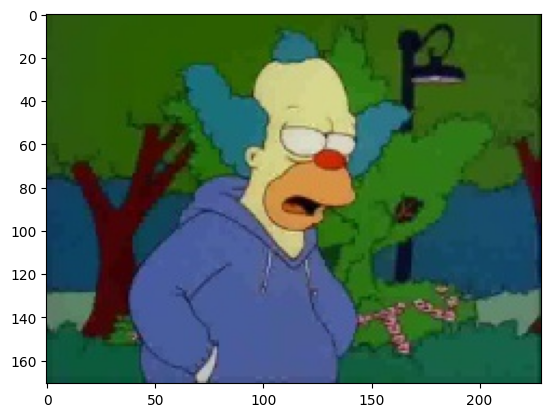

In [46]:
import matplotlib.pyplot as plt
from PIL import Image
image = Image.open('kaggle_simpson_testset/kaggle_simpson_testset/krusty_the_clown_15.jpg')
plt.imshow(image)
plt.show
image = trans(image).unsqueeze(0).cuda()
with torch.no_grad():
  output = model(image)
pred = (output.argmax(dim=1)).to('cpu').numpy()
print(labels[pred[0]])